
---

# **Data Science** | Visualização de Dados II
Caderno de **Exercícios**<br>


---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

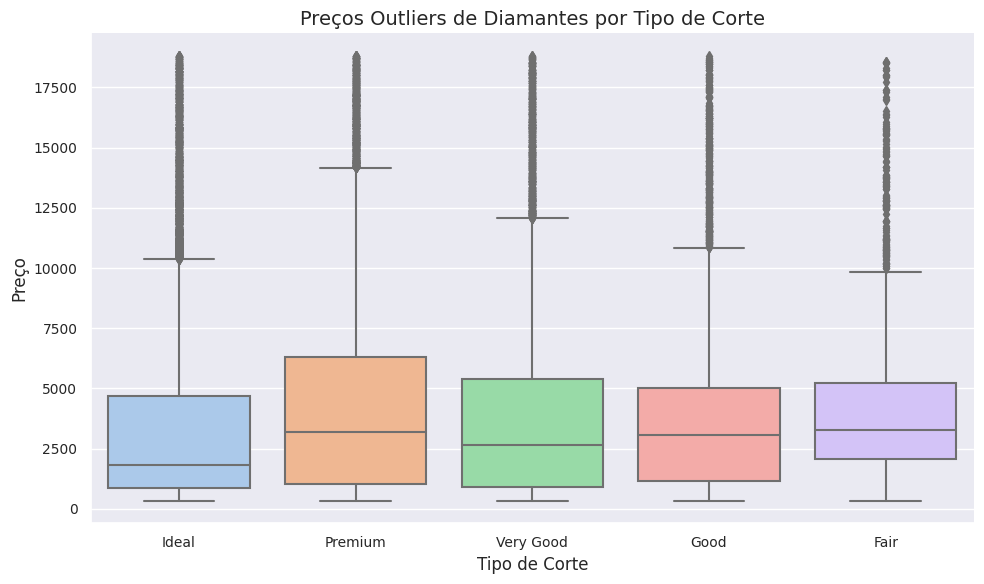

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
#data.head()

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
colors = sns.color_palette("pastel")

ax = sns.boxplot(x='cut', y='price', data=data, palette=colors)

ax.set_xlabel('Tipo de Corte', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)
ax.set_title('Preços Outliers de Diamantes por Tipo de Corte', fontsize=14)

sns.despine()

# Ajusta o tamanho da fonte dos rótulos dos eixos e do título
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Preços Outliers de Diamantes por Tipo de Corte', fontsize=14)

# Ajusta os espaçamentos dos subplots para evitar cortes de texto
plt.tight_layout()

plt.show()

**Insight do gráfico 1**: O tipo de corte "Fair" apresenta a maior dispersão de preços, com outliers tanto na parte inferior quanto na superior do boxplot. Isso sugere que os diamantes com esse tipo de corte podem ter uma variação
significativa nos preços, desde valores mais baixos até valores mais altos.

Os outliers nas caixas superiores dos boxplots podem indicar diamantes com preços excepcionalmente altos em relação à maioria dos diamantes do mesmo tipo de corte. Esses outliers podem estar relacionados a características valiosas, como alta qualidade, raridade ou tamanho excepcional.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

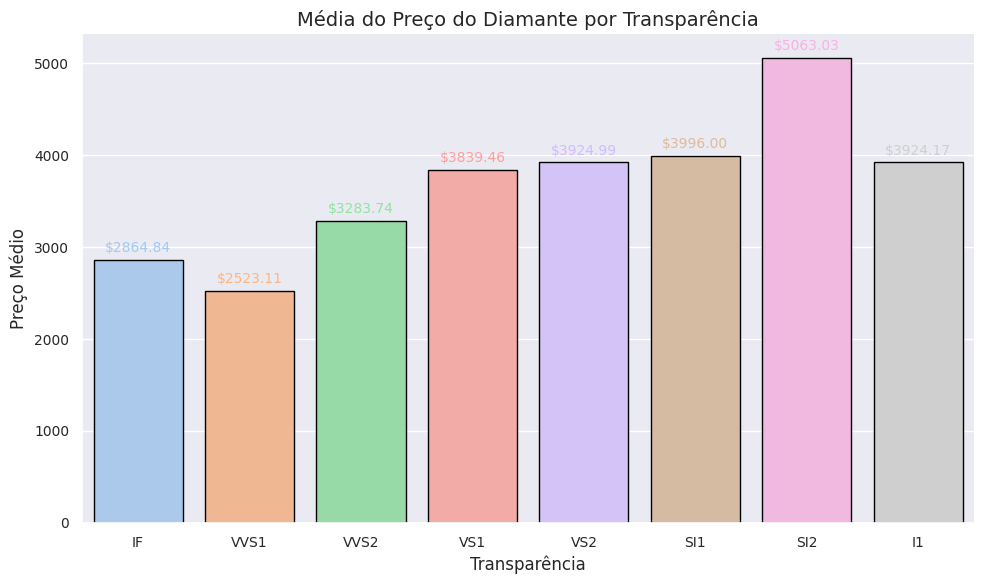

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
colors = sns.color_palette("pastel")

# Agrupa os dados por transparência e calcula a média do preço e do peso
grouped_data = data.groupby('clarity').agg({'price': 'mean', 'carat': 'mean'}).reset_index()

# Ordena os grupos de transparência por ordem crescente de preço médio
grouped_data = grouped_data.sort_values('price')

ax = sns.barplot(x='clarity', y='price', data=grouped_data, palette=colors)

ax.set_xlabel('Transparência', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)
ax.set_title('Média do Preço do Diamante por Transparência', fontsize=14)

sns.despine()

# Adiciona rótulos nas barras com os valores
for bar, c in zip(ax.patches, colors):
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 50,
        s=f'${height:.2f}',
        ha='center',
        va='bottom',
        color=c,
        fontsize=10,
    )
    bar.set_edgecolor('black')  # Adiciona borda preta às barras

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Média do Preço do Diamante por Transparência', fontsize=14)

plt.tight_layout()

plt.show()

**Insight do gráfico 2**: O gráfico revela uma relação significativa entre a categoria de transparência do diamante e seu preço médio. Quanto maior a transparência, maior é o preço médio do diamante. Isso sugere que a clareza é um fator importante que influencia o valor percebido do diamante.

No entanto, para confirmar se a relação é linear ou não, precisaríamos realizar uma análise de regressão ou um gráfico de dispersão para visualizar melhor essa relação.



---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [3]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


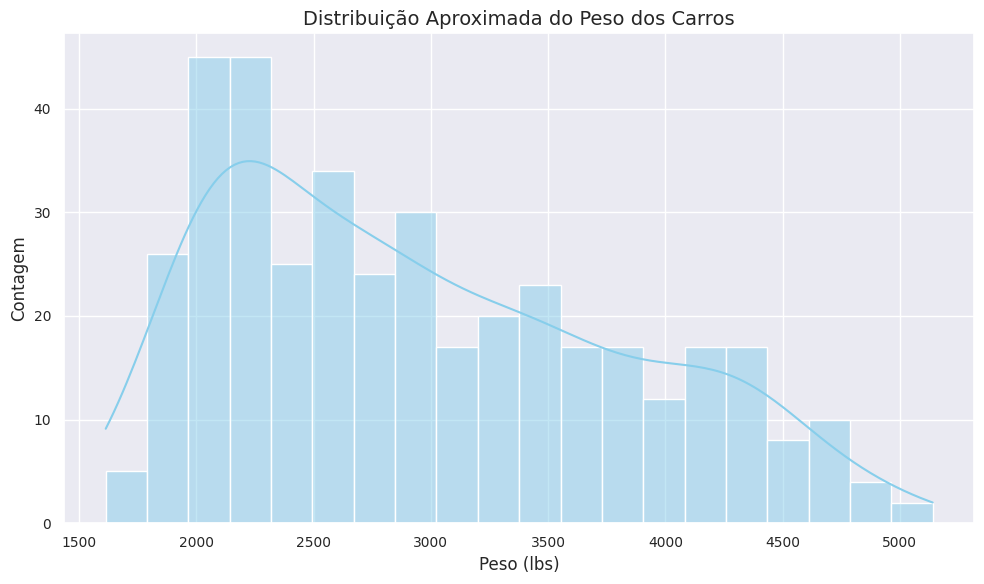

In [5]:
# gráfico do exercício 3

import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Cria o histograma para a variável "weight"
sns.histplot(data['weight'], bins=20, kde=True, color='skyblue')

plt.xlabel('Peso (lbs)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição Aproximada do Peso dos Carros', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()

**Insight do gráfico 3**: Insight: A maioria dos carros tem pesos concentrados em torno de um valor específico, com uma distribuição que se assemelha a uma distribuição normal. Isso sugere que existe uma tendência central no peso dos carros, e a maioria dos carros tem pesos próximos a esse valor central. Além disso, não parece haver uma presença significativa de outliers ou valores extremos, o que indica que a distribuição dos pesos é relativamente homogênea.

Em suma, o histograma proporciona uma visão clara da distribuição aproximada do peso dos carros e sugere uma distribuição com tendência central e homogeneidade, o que pode ser útil para entender a característica do peso dos carros em uma determinada amostra ou população.

---